
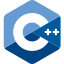
<br>

<div style="text-align:center; font-size:200%;">
  <b>GoF Adapter Pattern</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 05 GoF Adapter Pattern.ipynb -->
<!-- slides/module_450_design_patterns/topic_220_adapter.cpp -->


## Intent

- Adapt the interface of a class to an expected interface
- Collaboration of classes that cannot work together due to incompatible interfaces


## Also known as

- Wrapper


## Motivation

- Using a library class is not possible due to incompatible interfaces
- Example: Graphic editor
  - Graphic objects are relatively easy to implement
  - Text is more complex, it may make sense to use an external library
- The interface of this library is not compatible with the interface that our
  editor expects
- With an adapter we can adapt the interface of the library to the interface of
  our editor


<img src="img/adapter_example.svg"
     style="display:block;margin:auto;width:80%"/>


## Applicability

- Use of an existing class with an incompatible interface
- [...]


## Structure

- Two variants are defined: class adapter and object adapter
- Class adapters use multiple inheritance and are used less frequently
- Class diagram for object adapter:

<img src="img/pat_adapter.svg"
     style="display: block; margin: auto; width: 80%"/>


## Participants

- `Client`
  - Uses the interface of `Target`
- `Target`
  - Defines the interface used by `Client`
- `Adapter`
  - Implements the interface of `Target` and holds a reference to the `Adaptee`
- `Adaptee`
  - The class whose interface is to be adapted


## Collaborations

- The client calls a Target method on an Adapter object
- The adapter calls the corresponding method on the Adaptee


## Consequences

- Class adapter
  - ...
- Object adapter
  - an adapter can work with several adapted objects
  - makes it more difficult to override Adaptee methods


## Example Code

- Management of employees in a company
- Part of the data is provided by a legacy system
- The interface of the legacy system is not compatible with the interface of the
  new software
- We create an adapter that adapts the interface of the legacy system to the
  interface of the new software

In [ ]:
#include <iostream>
#include <memory>
#include <string>
#include <vector>

In [ ]:
class Employee {
public:
    Employee() = default;
    virtual ~Employee() = default;

    virtual std::string GetName() const = 0;
    virtual float GetSalary() const = 0;
};

In [ ]:
class NewEmployee : public Employee {
public:
    NewEmployee(std::string name, float salary)
        : name_{std::move(name)}, salary_{salary} {}

    std::string GetName() const override { return name_; }
    float GetSalary() const override { return salary_; }

private:
    std::string name_;
    float salary_;
};

In [ ]:
class LegacyEmployee {
public:
    std::string first_name;
    std::string last_name;
    float pay;

    LegacyEmployee(std::string first_name, std::string last_name, float pay)
        : first_name(first_name), last_name(last_name), pay(pay) {}
};

In [ ]:
class Company {
public:
    Company(
        std::vector<std::unique_ptr<Employee>> employees, float monthlyRent = 1000.0f)
        : employees_(std::move(employees)), monthlyRent_(monthlyRent) {}

    float MonthlyExpenses() const {
        float totalSalary{};
        for (const auto& employee : employees_) {
            totalSalary += employee->GetSalary();
        }
        return totalSalary + monthlyRent_;
    }

    std::string Employees() const {
        std::string list;
        for (const auto& employee : employees_) {
            list += employee->GetName() + "\n";
        }
        return list;
    }

private:
    std::vector<std::unique_ptr<Employee>> employees_;
    float monthlyRent_;
};

In [ ]:
class LegacyEmployeeAdapter : public Employee {
public:
    LegacyEmployeeAdapter(const LegacyEmployee& legacyEmployee)
        : legacyEmployee_(legacyEmployee) {}

    std::string GetName() const override {
        return legacyEmployee_.first_name + " " + legacyEmployee_.last_name;
    }

    float GetSalary() const override { return legacyEmployee_.pay; }

private:
    LegacyEmployee legacyEmployee_;
};

In [ ]:
std::unique_ptr<Employee> legacyEmployee1{
    std::make_unique<LegacyEmployeeAdapter>(LegacyEmployee{"John", "Doe", 1500.0f})};
std::unique_ptr<Employee> legacyEmployee2{
    std::make_unique<LegacyEmployeeAdapter>(LegacyEmployee{"Jane", "Miller", 2000.0f})};
std::unique_ptr<Employee> newEmployee1{
    std::make_unique<NewEmployee>("Max Mustermann", 2500.0f)};
std::unique_ptr<Employee> newEmployee2{
    std::make_unique<NewEmployee>("Erica Jones", 3000.0f)};

In [ ]:
std::vector<std::unique_ptr<Employee>> employees;
employees.push_back(std::move(legacyEmployee1));
employees.push_back(std::move(legacyEmployee2));
employees.push_back(std::move(newEmployee1));
employees.push_back(std::move(newEmployee2));

In [ ]:
Company company{std::move(employees)};

In [ ]:
std::cout << "Monthly expenses:" << company.MonthlyExpenses();

In [ ]:
std::cout << "Employees:\n" << company.Employees();


## Known Uses

- ET++ Draw
- InterViews 2.6
- ...


## Related Patterns

- Bridge: similar structure, but different intent (separation of interface and
  implementation)
- Decorator: extends another object without changing the interface
- Proxy: proxy for an object that has the same interface



## Workshop: Building a Unified Messaging Interface for a Chat Application

In this workshop, your task is to add various messaging services, such as
SMS, email, and an in-app chat system, to a chat application. The challenge
is that each of these services has its own way of sending and receiving
messages.

Below is the starter code with a user class and distinct classes for each
messaging service.

In [ ]:
#include <iostream>
#include <string>
#include <vector>

In [ ]:
class User {
public:
    std::string userName;
    std::string phoneNumber;
    std::string emailAddress;

    User(std::string userName, std::string phoneNumber, std::string emailAddress)
        : userName{userName}, phoneNumber{phoneNumber}, emailAddress{emailAddress} {}
}

In [ ]:
class SMS {
public:
    void SendText(std::string number, std::string message) {
        std::cout << "Sending SMS to " << number << ": " << message << "\n";
    }

    void ReceiveText(std::string number) {
        std::cout << "Receiving a SMS from " << number << "\n";
    }
};

In [ ]:
class Email {
public:
    void SendEmail(std::string emailAddress, std::string subject, std::string message) {
        std::cout << "Sending email to " << emailAddress << " with subject '" << subject
                  << "': " << message << "\n";
    }

    void ReceiveEmail(std::string emailAddress) {
        std::cout << "Receiving an email from " << emailAddress << "\n";
    }
};

In [ ]:
class InAppChat {
public:
    void SendMessage(const User& user, std::string message) {
        std::cout << "Sending message to " << user.userName << ": " << message << "\n";
    }

    void ReceiveMessage(const User& user) {
        std::cout << "Receiving a message from " << user.userName << "\n";
    }
};

In [ ]:
class MessagingService {
public:
    MessagingService() = default;
    MessagingService(const MessagingService&) = delete;
    MessagingService& operator=(const MessagingService&) = delete;
    MessagingService(MessagingService&&) = delete;
    MessagingService& operator=(MessagingService&&) = delete;
    virtual ~MessagingService() = default;

    virtual void Send(const User& to, std::string message) = 0;
    virtual void Receive(const User& from) = 0;
};

In [ ]:
class ChatApplication {
private:
    std::vector<std::unique_ptr<MessagingService>> adapters;

public:
    ChatApplication(std::vector<std::unique_ptr<MessagingService>> adapters)
        : adapters{std::move(adapters)} {}

    void SendMessage(const User& to, std::string message) {
        for (auto& adapter : adapters) {
            adapter->Send(to, message);
        }
    }

    void ReceiveMessage(const User& from) {
        for (auto& adapter : adapters) {
            adapter->Receive(from);
        }
    }
};


The following variables define the messaging services to be used by the chat
application. They do not need to be changed.

In [ ]:
SMS sms;
Email email;
InAppChat chat;


- Define adapters for the three messaging services


- Create adapters for the messaging services:

In [ ]:
// std::unique_ptr<MessagingService> smsAdapter{???};
// std::unique_ptr<MessagingService> emailAdapter{???};
// std::unique_ptr<MessagingService> chatAdapter{???};

In [ ]:
std::vector<std::unique_ptr<MessagingService>> messagingServices = {};


- Add the adapters to the vector `messagingServices`
- (You will probably need to move the adapters with `std::move()`)


- Verify that your adapters work by running the following lines
- You should see an output for each messaging service, showing the
  corresponding message

In [ ]:
ChatApplication chatApp{std::move(messagingServices)};

In [ ]:
chatApp.SendMessage({"Joe Example", "555-1234", "joe@example.org"}, "Hello!");

In [ ]:
chatApp.ReceiveMessage({"Joe Example", "555-1234", "joe@example.org"});